In [1]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("churn_data.csv", sep=';')
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [2]:
# Check for NAs
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [3]:
# Check variable types
data.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [4]:
# Get summary statistics
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data, title="Report")
# profile

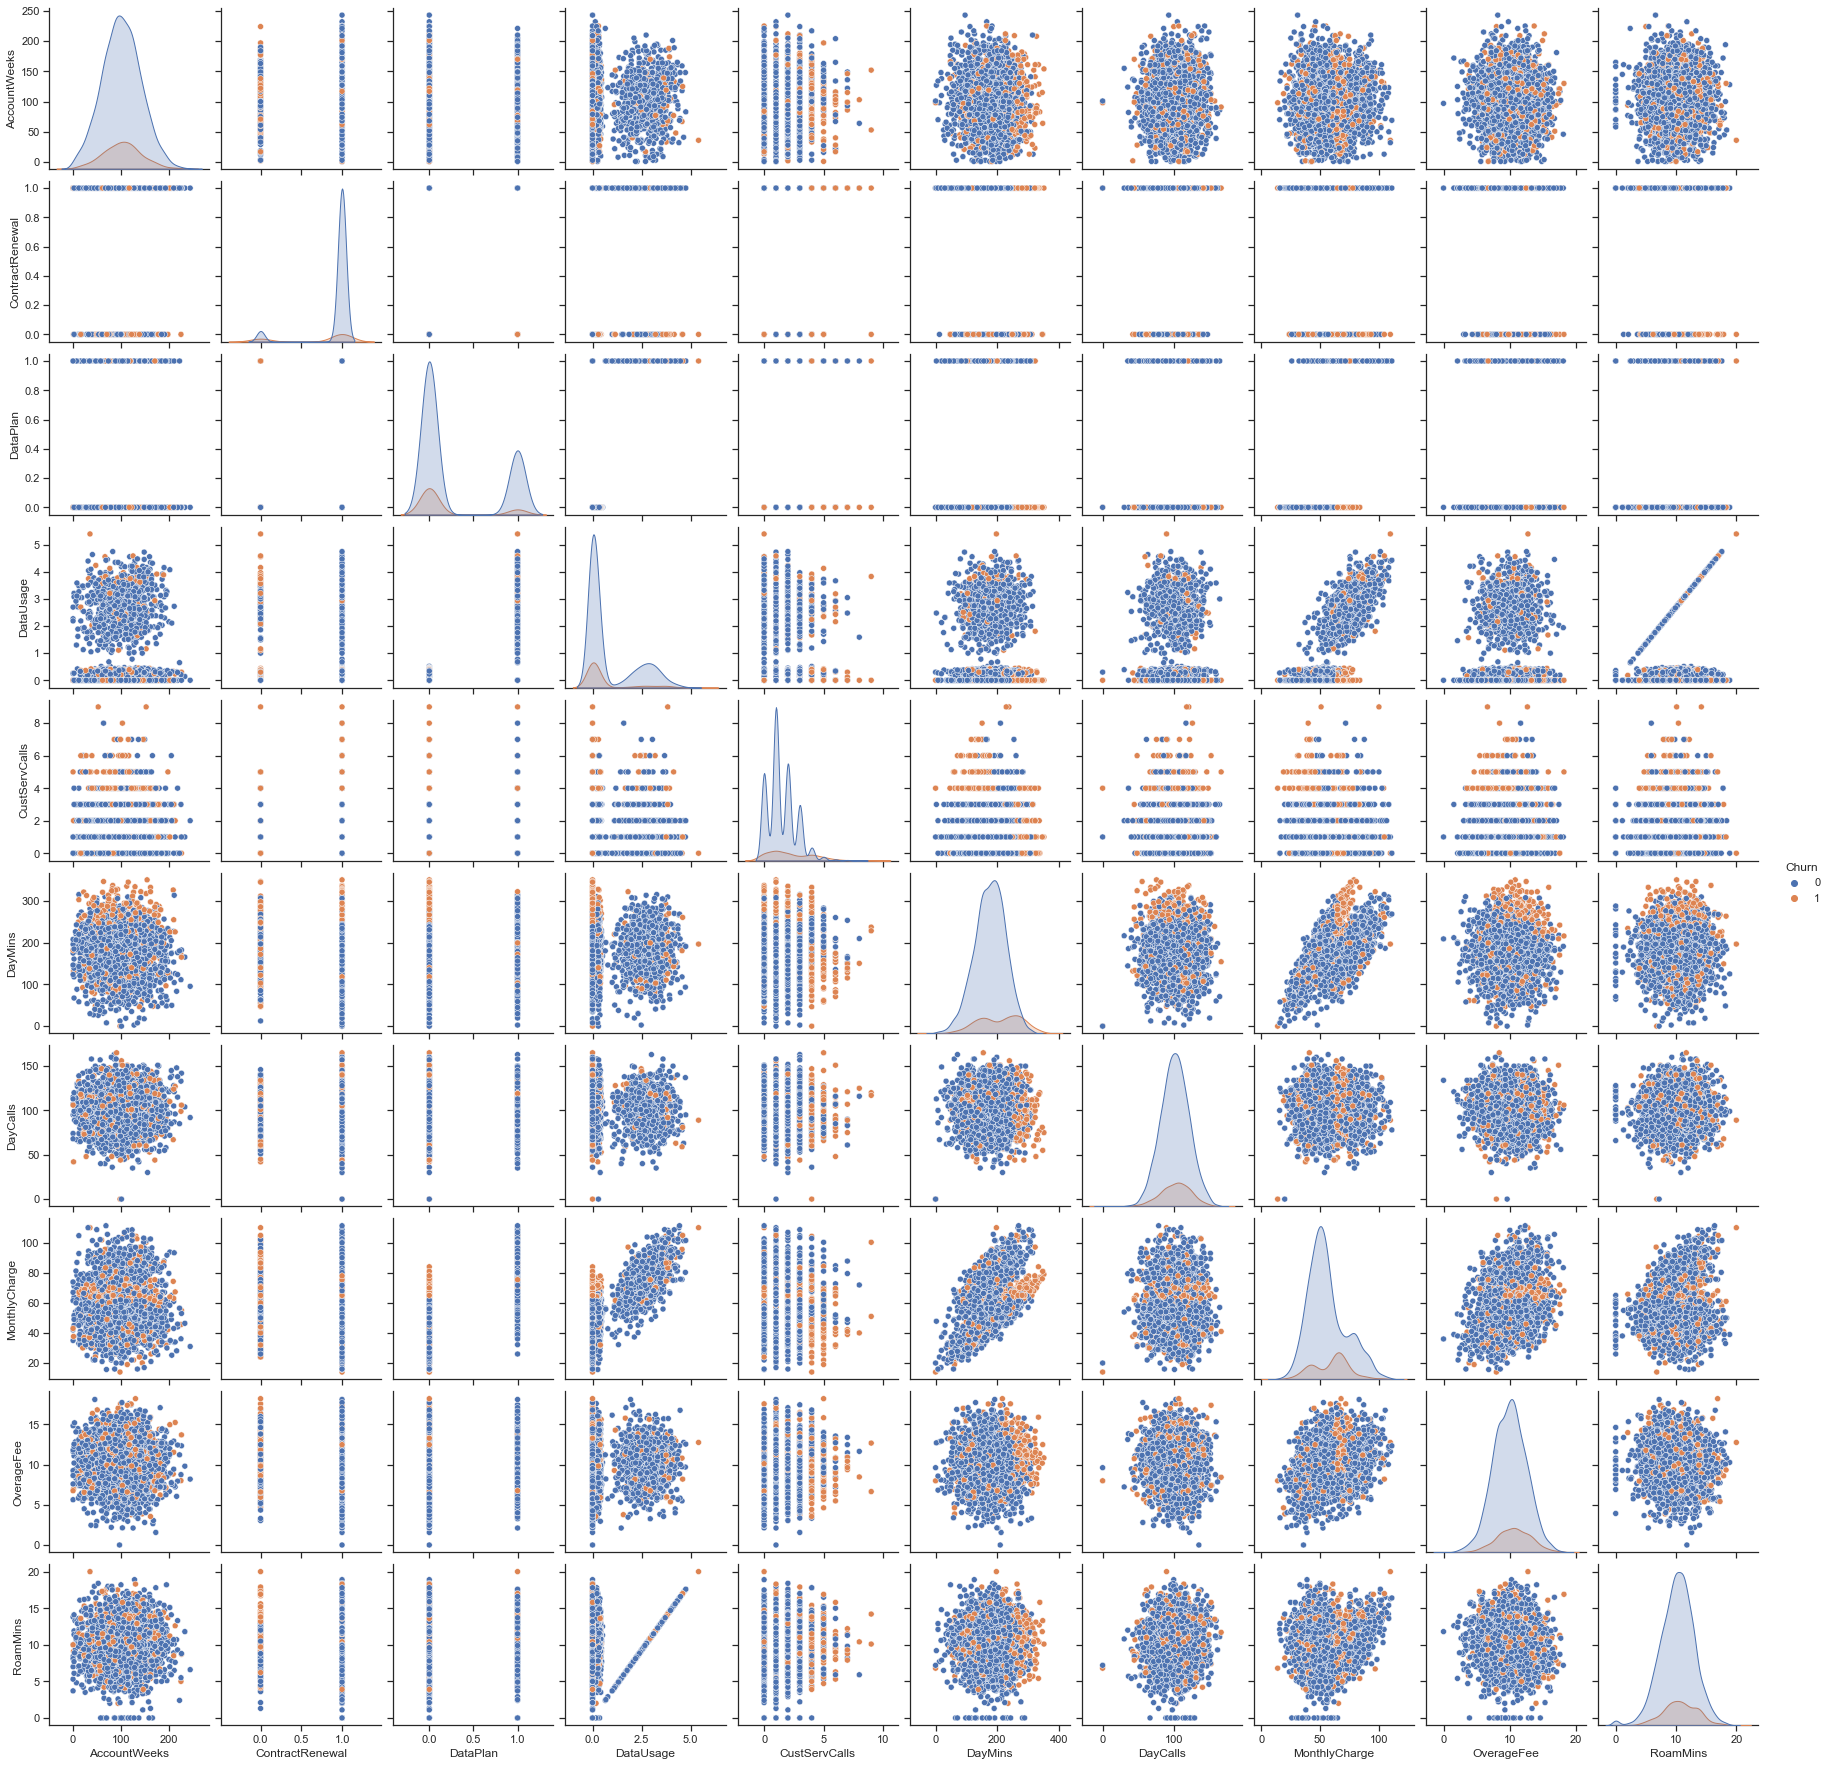

In [5]:
# Visualise the data
import seaborn as sns
sns.set(style = "ticks")
sns.pairplot(data, hue="Churn")

<AxesSubplot:xlabel='Churn', ylabel='CustServCalls'>

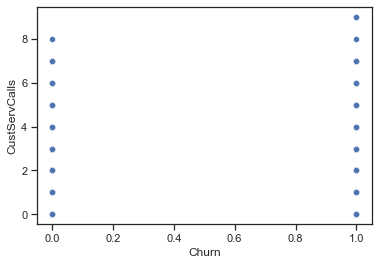

In [6]:
sns.scatterplot(data = data, x =data['Churn'], y=data['CustServCalls'])

In [7]:
# Based on the graphical representation, it seems like a large share of people who churn have high DayMins and a high
# and a highe Charge fee. Thus we multiply the two. Note that these people are also more distributed on the right side
# of DayMins. Fortunately, DayMins has a bigger support which favours the variable

data['DayMinsXOverageFee'] = data['DayMins'] * data['OverageFee']
data['CusExp'] = data['CustServCalls'] * data['AccountWeeks']
data['ServiceExposure'] = data['AccountWeeks'] * data['DayMins']
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DayMinsXOverageFee,CusExp,ServiceExposure
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0,2616.537,128,33932.8
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7,1580.448,107,17291.2
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,1475.004,0,33345.8
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6,928.140,168,25149.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1,1236.914,225,12502.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9,1683.836,384,29990.4
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,1772.537,204,15714.8
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,2610.752,56,5062.4
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0,1706.124,368,39339.2


In [8]:
# Investigate outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR),(Q3 + 1.5*IQR))

Churn                    0.000
AccountWeeks            -5.500
ContractRenewal          1.000
DataPlan                -1.500
DataUsage               -2.670
CustServCalls           -0.500
DayMins                 34.650
DayCalls                46.500
MonthlyCharge           13.200
OverageFee               3.170
RoamMins                 3.100
DayMinsXOverageFee    -169.805
CusExp                -225.000
ServiceExposure      -7380.000
dtype: float64 Churn                     0.000
AccountWeeks            206.500
ContractRenewal           1.000
DataPlan                  2.500
DataUsage                 4.450
CustServCalls             3.500
DayMins                 325.450
DayCalls                154.500
MonthlyCharge            98.000
OverageFee               16.930
RoamMins                 17.500
DayMinsXOverageFee     3712.171
CusExp                  503.000
ServiceExposure       42719.200
dtype: float64


In [9]:
from sklearn.model_selection import train_test_split
X = data.drop('Churn', axis = 1)
y = data['Churn']

# Split sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [10]:
### CLASSIFICATION TREE ###

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5, criterion='entropy')
clf = clf.fit(X_train, y_train)

In [12]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [13]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [14]:
clf.predict_proba(X_test)

array([[0.97397528, 0.02602472],
       [0.97397528, 0.02602472],
       [0.52777778, 0.47222222],
       ...,
       [0.        , 1.        ],
       [0.97397528, 0.02602472],
       [0.58333333, 0.41666667]])

In [15]:
# % of rightfully predicted data points
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9254545454545454

Text(66.5, 0.5, 'True')

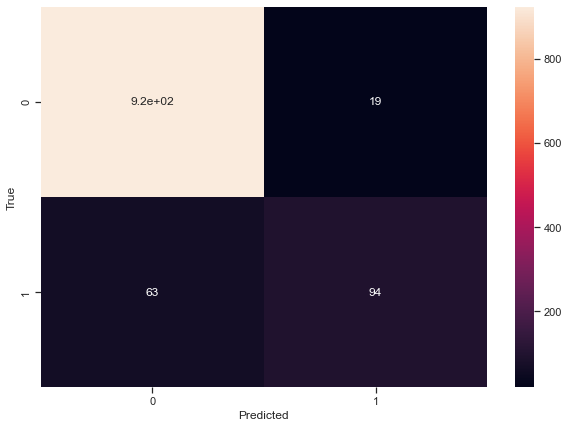

In [16]:
# get an ounderstanding of the wrong predictions
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictions, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [17]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.831858407079646

In [18]:
clf.feature_importances_

array([0.        , 0.16119804, 0.        , 0.08562887, 0.20814801,
       0.11934838, 0.        , 0.0489091 , 0.02018251, 0.06133441,
       0.29140762, 0.        , 0.00384305])

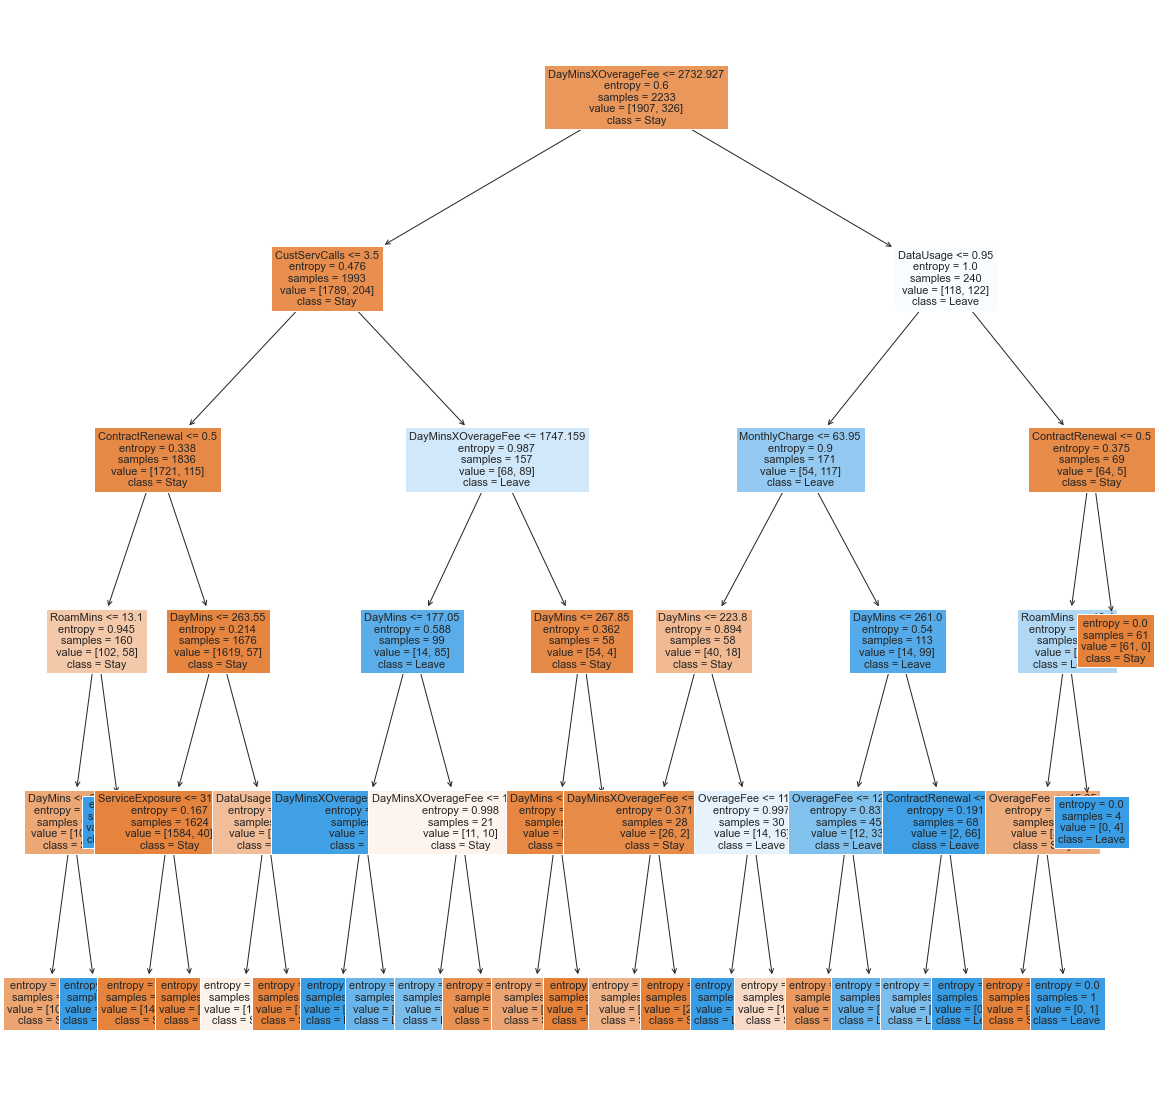

In [19]:
from sklearn import tree
fig1 = plt.figure(figsize=(20,20))
fig1 = tree.plot_tree(clf,
                   feature_names = X.columns,
                   class_names = {0: 'Stay', 1: 'Leave'},
                   filled = True,
                   fontsize = 11
                  )

In [20]:
# Systematically find the best depth
model_check = []

for i in range(1,8):
    model_check.append(i)
    clf_i = DecisionTreeClassifier(max_depth = i, criterion='entropy')
    clf_i = clf.fit(X_train, y_train)
    predictions_i = clf_i.predict(X_test)
    model_check.append(accuracy_score(y_test, predictions_i)**2)
    
print(model_check)

[1, 0.8598347107438016, 2, 0.8581495867768596, 3, 0.8598347107438016, 4, 0.8564661157024793, 5, 0.8564661157024793, 6, 0.8564661157024793, 7, 0.8547842975206612]


In [21]:
### RANDOM FOREST ###

In [22]:
# Import Random Forrest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=6, random_state=1)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

In [23]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [24]:
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))

0.9290909090909091
0.883495145631068


Text(66.5, 0.5, 'True')

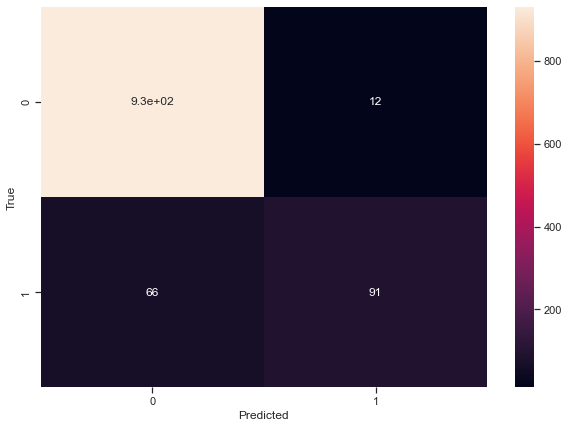

In [25]:
cm_2 = confusion_matrix(y_test, y_predict, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm_2, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [26]:
# Check the weight of the estimator (perhaps chage to graph)
rf.feature_importances_

array([0.01798426, 0.07489275, 0.03216414, 0.06191595, 0.14430199,
       0.14325855, 0.01921493, 0.11429535, 0.04212642, 0.04404374,
       0.20302509, 0.06549976, 0.03727708])

In [27]:
# Parameter Tuning Random Forrest
model_check2 = []
for i in range(1,8):
    model_check2.append(i)
    rf_i = RandomForestClassifier(max_depth = i, random_state=1)
    rf_i.fit(X_train, y_train)
    predict_i = rf_i.predict(X_test)
    model_check2.append(accuracy_score(y_test, predict_i)**2)
    
print(model_check2)

[1, 0.7349165289256199, 2, 0.7442983471074379, 3, 0.7953396694214876, 4, 0.8347314049586778, 5, 0.841389256198347, 6, 0.8632099173553719, 7, 0.8784801652892562]


In [28]:
### XGBOOSTING ###

In [29]:
# Specify boost parameters
from xgboost import XGBClassifier
xgb  = XGBClassifier(random_state=1)
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 1,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [30]:
# Estimate the XGBoost Model
xgb.fit(X_train, y_train)
y_predict2 = xgb.predict(X_test)

# Get model evaluation
print(accuracy_score(y_test, y_predict2))
print(precision_score(y_test, y_predict2))

0.9345454545454546
0.8455284552845529


In [31]:
# Lets find the best model
parameters={
 "max_depth"        : [4, 5, 6, 7, 8, 9, 10, 11, 12],  
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25] ,
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

In [32]:
# Hyperparameter optimisation
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search=RandomizedSearchCV(xgb, param_distributions=parameters, n_iter=10, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)
random_search.fit(X_test, y_test)
random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.7}

In [33]:
# Now we restimate the the xgboost model with the parameters above
xgb_2  = XGBClassifier(random_state=1, max_depth=4, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4)
xgb_2.fit(X_train, y_train)
y_predict3 = xgb_2.predict(X_test)

# Get model evaluation
print(accuracy_score(y_test, y_predict3))
print(precision_score(y_test, y_predict3))

0.9272727272727272
0.8598130841121495


Text(66.5, 0.5, 'True')

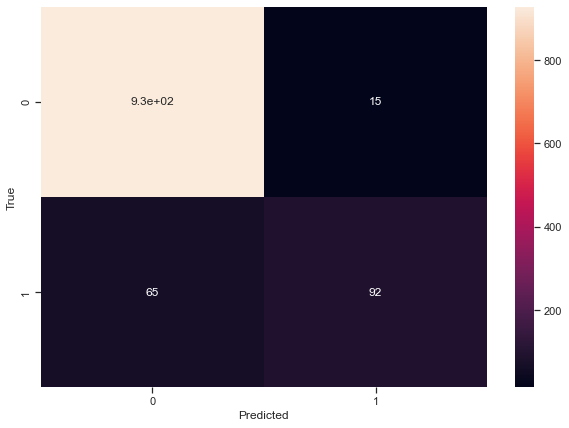

In [34]:
# Display confusion matrix
cm_3 = confusion_matrix(y_test, y_predict3, labels=[0,1])
plt.figure(figsize=(10,7))
sns.heatmap(cm_3, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')